In [45]:
import pandas as pd

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix

In [195]:
def evaluate_with_best_threshold(model, X, y, plot=True):
    """
    Evaluate a binary classifier (Keras model) by finding the best threshold for F1.

    Args:
        model: Trained Keras model (sigmoid output).
        X: Features (numpy array or tensor).
        y: True labels (numpy array).
        plot: Whether to plot confusion matrix (default=True).

    Returns:
        best_threshold (float), classification_report (str)
    """
    # Predict probabilities
    y_prob = model.predict(X).ravel()

    # Precision-Recall curve
    precisions, recalls, thresholds = precision_recall_curve(y, y_prob)

    # Compute F1 at each threshold
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)

    # Best threshold
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    best_f1 = f1_scores[best_idx]

    print(f"\n✅ Best Threshold = {best_threshold:.3f}")
    print(f"✅ Best F1-score = {best_f1:.3f}\n")

    # Apply threshold
    y_pred = (y_prob > best_threshold).astype(int)

    # Classification report
    report = classification_report(y, y_pred, digits=3)
    print(report)

    # Confusion matrix
    if plot:
        cm = confusion_matrix(y, y_pred)
        plt.figure(figsize=(7,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Confusion Matrix")
        plt.show()

    return best_threshold, report

In [196]:
df = pd.read_csv('Churn_Modelling.csv')

In [130]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [131]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [132]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [133]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [134]:
df.isnull().any()

,0
CreditScore,False
Geography,False
Gender,False
Age,False
Tenure,False
Balance,False
NumOfProducts,False
HasCrCard,False
IsActiveMember,False
EstimatedSalary,False


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [136]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [137]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
df['CreditScore'] = StandardScaler().fit_transform(df[['CreditScore']])
df['Balance'] = StandardScaler().fit_transform(df[['Balance']])
df['EstimatedSalary'] = StandardScaler().fit_transform(df[['EstimatedSalary']])

In [140]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,42,2,-1.225848,1,1,1,0.021886,1,False,False,False
1,-0.440036,41,1,0.117350,1,0,1,0.216534,0,False,True,False
2,-1.536794,42,8,1.333053,3,1,0,0.240687,1,False,False,False
3,0.501521,39,1,-1.225848,2,0,0,-0.108918,0,False,False,False
4,2.063884,43,2,0.785728,1,1,1,-0.365276,0,False,True,False


In [141]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [144]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [145]:
model = Sequential(
    layers=[
        Dense(units=20, activation='relu'),
        Dense(units=10, activation='relu'),
        Dense(units=1, activation='sigmoid')
    ]
)

In [146]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [147]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7929 - loss: 1.9371
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7876 - loss: 0.5342
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7884 - loss: 0.4972
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7975 - loss: 0.4635
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7982 - loss: 0.4624
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8092 - loss: 0.4418
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8125 - loss: 0.4356
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8163 - loss: 0.4214
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8217 - loss: 0.4183
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8250 - loss: 0.4133
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8209 - loss: 0.4088
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

✅ Best Threshold = 0.356
✅ Best F1-score = 0.620

              precision    recall  f1-score   support

           0      0.910     0.897     0.903      1607
           1      0.601     0.636     0.618       393

    accuracy                          0.846      2000
   macro avg      0.755     0.766     0.761      2000
weighted avg      0.849     0.846     0.847      2000



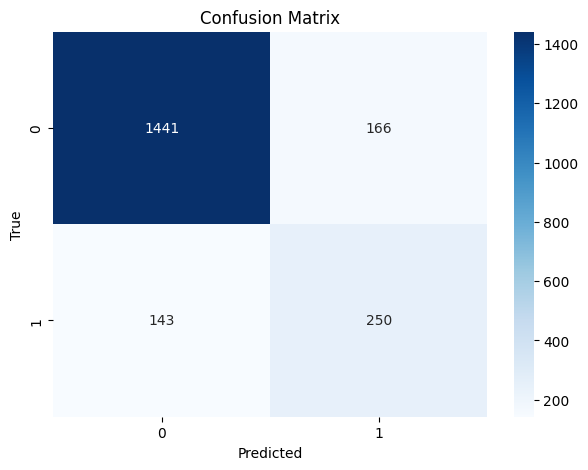

In [148]:
best_threshold, report = evaluate_with_best_threshold(model, X_test, y_test)

## Under Sampling

In [149]:
df1 = df[df['Exited'] == 1]

In [150]:
df0 =  df[df['Exited'] == 0]

In [151]:
df0.shape

(7963, 12)

In [152]:
df0 = df0.sample(df1.shape[0])

In [153]:
df0.shape

(2037, 12)

In [154]:
df_down = pd.concat([df0, df1], axis=0)

In [155]:
df_down.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
2959,-1.247084,25,9,1.379524,1,1,0,-0.625330,0,False,False,True
847,-1.888585,42,5,-1.225848,2,1,0,0.438465,0,False,False,False
2197,-0.377955,35,2,0.814143,1,1,1,-1.196153,0,False,True,True
4330,1.349956,19,3,-1.225848,2,1,1,0.420937,0,False,False,False
6441,-1.412633,45,1,1.640245,1,1,0,-0.690605,0,False,False,True


In [156]:
df_down.shape

(4074, 12)

In [157]:
X = df_down.drop('Exited', axis=1)
y = df_down['Exited']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=43)

In [159]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7344 - loss: 0.5339
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7730 - loss: 0.4836
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7572 - loss: 0.4980
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7719 - loss: 0.4710
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7732 - loss: 0.4779
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7627 - loss: 0.4867
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7692 - loss: 0.4709
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7729 - loss: 0.4661
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7623 - loss: 0.4824
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7552 - loss: 0.4865
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7571 - loss: 0.4861
Epoch 12/100
102/102 ━━━━━━━━━━━━━━━━━━━━

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

✅ Best Threshold = 0.437
✅ Best F1-score = 0.768

              precision    recall  f1-score   support

           0      0.799     0.662     0.724       408
           1      0.711     0.833     0.767       407

    accuracy                          0.747       815
   macro avg      0.755     0.747     0.745       815
weighted avg      0.755     0.747     0.745       815



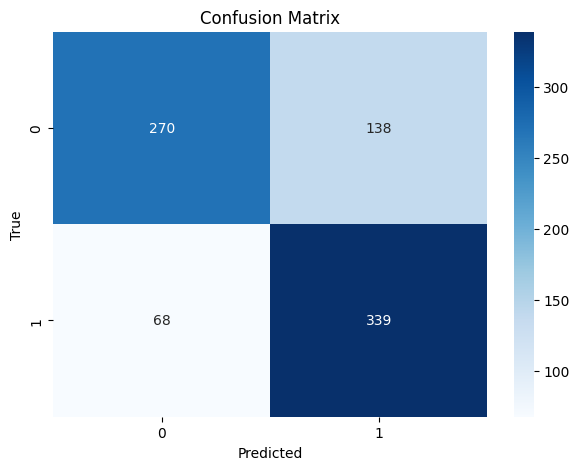

In [160]:
best_threshold, report = evaluate_with_best_threshold(model, X_test, y_test)

## Upsampling

In [161]:
df1 = df[df['Exited'] == 1]
df0 = df[df['Exited'] == 0]

In [162]:
df1.shape

(2037, 12)

In [163]:
df0.shape

(7963, 12)

In [164]:
df1 = df1.sample(df0.shape[0], replace=True)

In [165]:
df1.shape

(7963, 12)

In [166]:
df_up = pd.concat([df0, df1], axis=0)

In [167]:
df_up.shape

(15926, 12)

In [168]:
X = df_up.drop('Exited', axis=1)
y = df_up['Exited']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=43)

In [170]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7704 - loss: 0.4586
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7822 - loss: 0.4533
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7777 - loss: 0.4618
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7813 - loss: 0.4574
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7826 - loss: 0.4551
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7844 - loss: 0.4525
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7794 - loss: 0.4607
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7752 - loss: 0.4651
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7807 - loss: 0.4547
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7729 - loss: 0.4595
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7801 - loss: 0.4540
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

✅ Best Threshold = 0.314
✅ Best F1-score = 0.790

              precision    recall  f1-score   support

           0      0.845     0.648     0.733      1593
           1      0.715     0.881     0.789      1593

    accuracy                          0.765      3186
   macro avg      0.780     0.765     0.761      3186
weighted avg      0.780     0.765     0.761      3186



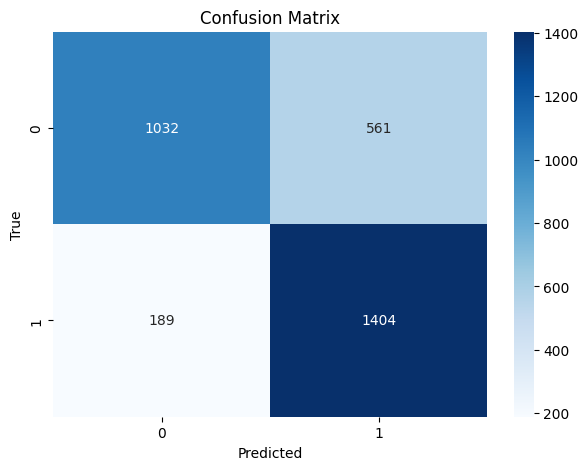

In [171]:
best_threshold, report = evaluate_with_best_threshold(model, X_test, y_test)

## SMOTE

In [172]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [173]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

,count
Exited,
1,7963
0,7963


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm, random_state=43)

In [175]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7995 - loss: 0.4205
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8056 - loss: 0.4104
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8004 - loss: 0.4191
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8081 - loss: 0.4088
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8096 - loss: 0.4033
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8100 - loss: 0.4039
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8142 - loss: 0.4007
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8079 - loss: 0.4076
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8087 - loss: 0.4104
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8114 - loss: 0.4050
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8110 - loss: 0.4053
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

✅ Best Threshold = 0.322
✅ Best F1-score = 0.823

              precision    recall  f1-score   support

           0      0.868     0.729     0.792      1593
           1      0.766     0.889     0.823      1593

    accuracy                          0.809      3186
   macro avg      0.817     0.809     0.808      3186
weighted avg      0.817     0.809     0.808      3186



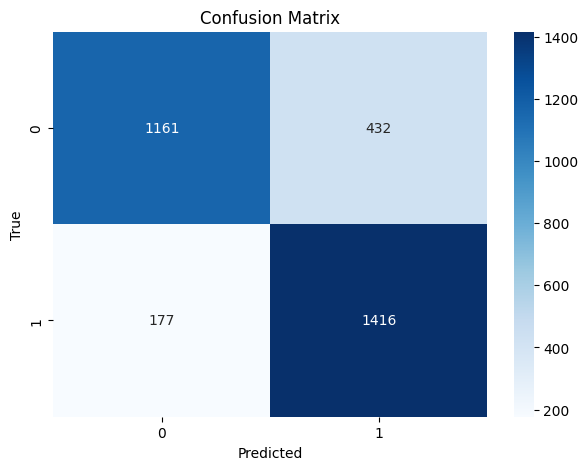

In [176]:
best_threshold, report = evaluate_with_best_threshold(model, X_test, y_test)

## Ensemble

In [177]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [178]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=15, stratify=y)

In [179]:
df2 = X_train.copy()
df2['Exited'] = y_train

In [180]:
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
5710,1.318916,34,5,1.002947,2,0,0,-0.558898,False,False,True,0
3745,1.298222,37,1,0.266661,2,1,1,1.669154,True,False,False,0
5429,0.325625,48,7,-1.225848,2,1,0,-0.608984,False,False,False,0
551,0.242851,47,6,0.487481,1,1,1,-1.704314,True,False,True,1
8967,1.908682,25,7,-1.225848,2,1,1,-0.289363,False,False,True,0


In [181]:
df2_class0 = df2[df2.Exited == 0]
df2_class1 = df2[df2.Exited == 1]

In [182]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train

In [183]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 0, 1495)

In [184]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7792 - loss: 0.4564
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7950 - loss: 0.4314
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7787 - loss: 0.4508
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7836 - loss: 0.4454
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7885 - loss: 0.4437
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7830 - loss: 0.4503
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7836 - loss: 0.4490
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.4314
Epoch 9/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7939 - loss: 0.4248
Epoch 10/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 0.4323
Epoch 11/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7858 - loss: 0.4340
Epoch 12/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [185]:
pred1 = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [186]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 1495, 2990)

In [187]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7673 - loss: 0.4620
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7764 - loss: 0.4430
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7771 - loss: 0.4513
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7802 - loss: 0.4471
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7701 - loss: 0.4523
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7723 - loss: 0.4565
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7767 - loss: 0.4493
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7748 - loss: 0.4407
Epoch 9/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7986 - loss: 0.4302
Epoch 10/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7698 - loss: 0.4644
Epoch 11/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7759 - loss: 0.4580
Epoch 12/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [188]:
pred2 = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [189]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 2990, 4130)

In [190]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7785 - loss: 0.4475
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7915 - loss: 0.4353
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.4341
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8023 - loss: 0.4157
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4292
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7922 - loss: 0.4422
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4156
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.4351
Epoch 9/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7985 - loss: 0.4288
Epoch 10/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8079 - loss: 0.4239
Epoch 11/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7985 - loss: 0.4175
Epoch 12/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [191]:
pred3 = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [192]:
pred_final = pred1.copy()
for i in range(len(pred1)):
    n_ones = pred1[i] + pred2[i] + pred3[i]
    if n_ones > 1:
        pred_final[i] = 1
    else:
        pred_final[i] = 0

In [194]:
cl_rep = classification_report(y_test, pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.97      0.58      0.73      1593
           1       0.36      0.92      0.52       407

    accuracy                           0.65      2000
   macro avg       0.66      0.75      0.62      2000
weighted avg       0.84      0.65      0.68      2000



Text(95.72222222222221, 0.5, 'Truth')

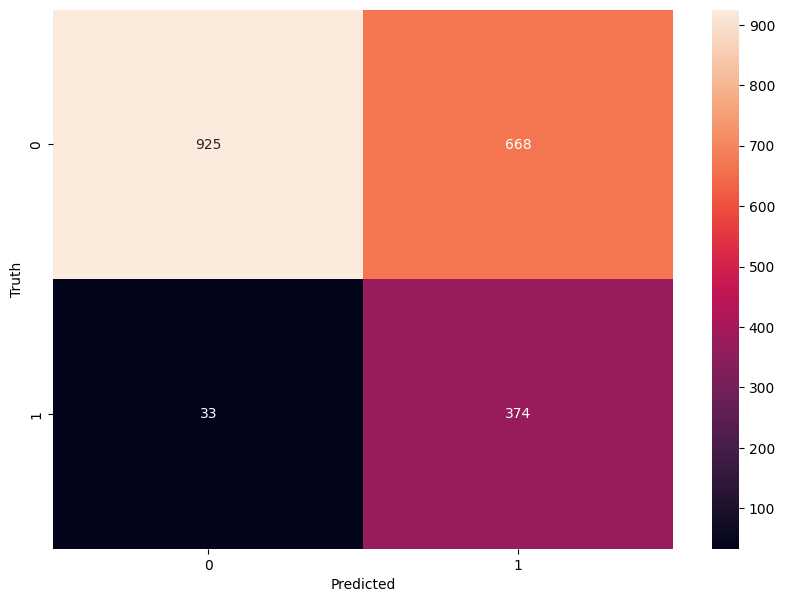

In [199]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=pred_final)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')